In [1]:
import calib_tools as ct
import pandas as pd
import numpy as np
import os
import glob
import re

def create_df(csv_files, cam_sns):
    
    # list of all the dataframes coming from the csv_files
    df_list = list()
    
    # loop over the list of csv files
    for f in csv_files:

        # read the csv file
        df = pd.read_csv(f)
        
        # keep the cam* from the csv_file and add the correspondant cam_sns column into the df.
        print('File Name:', f.split("/")[-1])
        res = re.findall("cam(\d+)", f)
        df.insert(loc=0, column='cam_sns', value=cam_sns[int(res[0])])
        
        # get the columns name and concat the dataframe while there is a csv_file.
        column_name = df.columns
        
        df_list.append(df)
    
    return df_list

# cameras serial numbers
cam_sns = ['08150951', '08151951', '08152151', '08154551']

# use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join("/home/arives/Documents/Calibration/coords/", "*.csv"))

# call the function to get all the csv_file and store it into a list of df
cam = create_df(csv_files, cam_sns)

File Name: test_cam1-0554.csv
File Name: test_cam3-0554.csv
File Name: test_cam2-0554.csv
File Name: test_cam0-0554.csv


In [2]:
# Print and check the first df
cam[0]

,cam_sns,elbow_x,elbow_y,wrist_x,wrist_y,thumb1_x,thumb1_y,thumb2_x,thumb2_y,thumb3_x,...,ring4_x,ring4_y,little1_x,little1_y,little2_x,little2_y,little3_x,little3_y,little4_x,little4_y
0,08151951,246.542755,773.917664,246.636810,771.923340,290.920898,686.418091,319.098938,673.534363,383.892944,...,397.030426,699.819580,320.739227,769.961487,343.565826,755.071594,358.502228,739.892883,371.904266,728.446228
1,08151951,246.775040,774.165039,246.682663,771.873901,290.826904,686.070251,319.489044,673.395081,383.809296,...,397.553833,699.340942,321.901489,771.094421,342.836914,755.504944,357.535004,740.624878,371.679901,728.776367
2,08151951,247.274139,773.664917,247.287506,771.717407,290.854492,686.053650,320.020691,673.281128,384.096741,...,397.840027,698.839111,320.495697,769.933167,342.723907,754.806458,358.113953,739.501099,372.131866,728.334778
3,08151951,246.753510,773.768127,246.346588,771.286987,290.335144,686.267151,319.340332,673.118958,384.164795,...,397.725616,699.286438,319.633118,770.704529,342.630127,755.159973,357.791626,740.872620,371.598328,728.825439
4,08151951,247.304657,773.354187,247.226273,771.351501,291.555695,685.697083,319.408112,672.978882,384.200104,...,397.225037,699.166138,320.224152,769.619202,342.559967,754.652527,357.568024,740.321350,371.610779,728.564148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,08151951,253.249680,778.168152,252.925262,772.528625,296.093170,676.782349,329.991852,663.706665,340.290741,...,410.561401,689.859863,328.082611,770.520874,358.859314,746.826721,379.402924,729.710449,390.317444,718.375916
550,08151951,253.375198,777.747375,252.543777,773.157532,295.624084,677.623596,330.079285,663.813660,340.911346,...,410.098419,690.040894,327.571167,770.490723,358.398895,746.581726,378.610504,730.155823,390.077850,718.460022
551,08151951,252.968674,778.007385,252.564102,772.804993,296.619080,677.330627,331.375885,663.214539,385.290222,...,410.964325,690.029602,328.156158,770.476562,358.720428,746.900574,378.944092,729.958130,390.342987,718.166443
552,08151951,253.225876,778.156921,252.855362,773.137878,296.115814,677.270020,330.066315,663.618652,340.365173,...,410.719727,690.121155,328.477661,770.243591,358.995941,746.949646,378.948975,729.993896,390.584625,718.807922


In [7]:
# loading extrinsic, intrinsic and rectify params.
import pickle

with open('/home/arives/PycharmProjects/3dplot_project/params/extrinsic_params.pickle', 'rb') as pickle_file:
    extrinsic_params = pickle.load(pickle_file)
    
with open('/home/arives/PycharmProjects/3dplot_project/params/intrinsic_params.pickle', 'rb') as pickle_file:
    intrinsic_params = pickle.load(pickle_file)
    
with open('/home/arives/PycharmProjects/3dplot_project/params/rectify_params.pickle', 'rb') as pickle_file:
    rectify_params = pickle.load(pickle_file)
    
with open('/home/arives/PycharmProjects/3dplot_project/params/extrinsic_sba_params.pickle', 'rb') as pickle_file:
    sba_params = pickle.load(pickle_file)
    print(intrinsic_params)

{'08154551': {'k': array([[1.07206493e+03, 0.00000000e+00, 6.39500000e+02],
       [0.00000000e+00, 1.07265351e+03, 5.11500000e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), 'd': array([[ 1.24258369e+01, -1.17361931e+01,  6.06711003e-04,
        -1.30232216e-04, -4.92822889e+01,  1.25431042e+01,
        -1.02275535e+01, -5.33273608e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]]), 'rpe': 0.15526126502513724}, '08150951': {'k': array([[1.03784426e+03, 0.00000000e+00, 6.39500000e+02],
       [0.00000000e+00, 1.03877703e+03, 5.11500000e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), 'd': array([[ 3.12268108e+00,  4.19882329e+00,  1.04859284e-03,
        -1.63293114e-04, -6.32377679e+00,  3.22869921e+00,
         4.49839782e+00, -6.61678493e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]]), 'rpe': 0.0817805

In [32]:
import pickle

sba = {'08154551': {'r': [ -0.10072369672651904, -1.8295835637775493, -1.5869794059522166,], 
                    't': [ 359.16088404681136, -832.3663733053477, 410.0157771308804,]
                   }, 
       
       '08150951': {'r': [ 0.012643916562726934, -0.005708291084718532, 0.01504854687788278,], 
                    't': [ 5.266859444641506, 7.283370892527169, 15.465326039859503,]
                   }, 
       
       '08151951': {'r': [ -0.5407588993571167, -0.5002562319245032, -0.36006128157252576,], 
                    't': [ 316.97687425678026, -550.3545770603832, -17.66308558010816,]
                   }, 
       
       '08152151': {'r': [ -0.006260916440617595, 1.5396547326229266, 2.5841262677709227,], 
                    't': [ -17.90600336567318, -664.4201090772988, 338.55233577610693,]
                   }
      }


with open('sba_params_new.pickle', 'wb') as handle:
    pickle.dump(sba, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
intrinsic = {'08154551': {'k': [ [ 1079.8204915082479, 0.0, 639.5,], [ 0.0, 1079.8204915082479, 511.5,], [ 0.0, 0.0, 1.0,],], 
                          'd': [ -0.08852062534031914, 0.0, 0.0, 0.0, 0.0,],
                         }, 
             
             '08150951': {'k': [ [ 1067.2488144406618, 0.0, 639.5,], [ 0.0, 1067.2488144406618, 511.5,], [ 0.0, 0.0, 1.0,],], 
                          'd': [ -0.10414010131646079, 0.0, 0.0, 0.0, 0.0,],
                         }, 
             
             '08151951': {'k': [ [ 1066.3216914825066, 0.0, 639.5,], [ 0.0, 1066.3216914825066, 511.5,], [ 0.0, 0.0, 1.0,],], 
                          'd': [ -0.08341380736748455, 0.0, 0.0, 0.0, 0.0,],
                         }, 
             
             '08152151': {'k': [ [ 1101.3012464800388, 0.0, 639.5,], [ 0.0, 1101.3012464800388, 511.5,], [ 0.0, 0.0, 1.0,],], 
                          'd': [ -0.10151900181457128, 0.0, 0.0, 0.0, 0.0,],
                         }
            }


with open('intrinsic_params_new.pickle', 'wb') as handle:
    pickle.dump(intrinsic, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
with open('intrinsic_params_new.pickle', 'rb') as file:
    intrinsic = pickle.load(file)
    print(intrinsic)

{'08154551': {'k': [[1075.8326334666847, 0.0, 639.5], [0.0, 1075.8326334666847, 511.5], [0.0, 0.0, 1.0]], 'd': [[-0.08674481838480003, 0.0, 0.0, 0.0, 0.0]]}, '08150951': {'k': [[1069.5142611466483, 0.0, 639.5], [0.0, 1069.5142611466483, 511.5], [0.0, 0.0, 1.0]], 'd': [[-0.10339385403682826, 0.0, 0.0, 0.0, 0.0]]}, '08151951': {'k': [[1070.7391194081051, 0.0, 639.5], [0.0, 1070.7391194081051, 511.5], [0.0, 0.0, 1.0]], 'd': [[-0.08565941718014912, 0.0, 0.0, 0.0, 0.0]]}, '08152151': {'k': [[1092.3519595744865, 0.0, 639.5], [0.0, 1092.3519595744865, 511.5], [0.0, 0.0, 1.0]], 'd': [[-0.11594581296189105, 0.0, 0.0, 0.0, 0.0]]}}


In [4]:
def locate_3d_function(body_part, cam, cam_sns, intrinsic_params, extrinsic_params, rectify_params):
    # table to store the 3d coordinates
    result = []
    # create the bodyparts dictionnary
    n_frames=len(cam[0])
    for frame_idx in range(n_frames):
        bodypart_dict = {}
        for cam_idx in range(len(cam)):
            bodypart_dict[cam[cam_idx]['cam_sns'][0]]= np.array([cam[0]['{}_x'.format(body_part)][frame_idx], 
                                                            cam[0]['{}_y'.format(body_part)][frame_idx]])
        # call the function to compute the 3d points and add it to the table
        coord, n_cams=ct.locate_dlt(cam_sns=cam_sns, camera_coords=bodypart_dict, intrinsic_params=intrinsic_params, extrinsic_params=extrinsic_params, rectify_params=rectify_params)
        result.append(coord)
    return result

# table to store all the coordinates from all the bodyparts
coordinates = {}
body_parts=list(cam[0].columns[1:])
body_parts=list(np.unique([x.split('_')[0] for x in body_parts]))
for body_part in body_parts:
    coordinates[body_part]=locate_3d_function(body_part, cam, cam_sns, intrinsic_params, extrinsic_params, rectify_params)        

In [5]:
coordinates['wrist']

[array([[-0.35613064, -0.43034519, -0.21442424]]),
 array([[-0.35611216, -0.43028743, -0.21438878]]),
 array([[-0.35583288, -0.42975737, -0.21441939]]),
 array([[-0.35631496, -0.43026681, -0.21369415]]),
 array([[-0.35588825, -0.42963251, -0.21403216]]),
 array([[-0.35621656, -0.43029118, -0.21405499]]),
 array([[-0.35635773, -0.43027198, -0.2135634 ]]),
 array([[-0.35603728, -0.42999536, -0.2141487 ]]),
 array([[-0.35568876, -0.42908103, -0.21376574]]),
 array([[-0.35628897, -0.43035205, -0.21391998]]),
 array([[-0.35615367, -0.43013003, -0.2139929 ]]),
 array([[-0.35601537, -0.42984182, -0.21396552]]),
 array([[-0.35587253, -0.42945056, -0.21378145]]),
 array([[-0.35614324, -0.43004187, -0.2138808 ]]),
 array([[-0.35621568, -0.43033434, -0.21412936]]),
 array([[-0.35618724, -0.4301512 , -0.21391868]]),
 array([[-0.35627182, -0.43064561, -0.21446171]]),
 array([[-0.35624636, -0.43067212, -0.21458851]]),
 array([[-0.35607581, -0.42972243, -0.21357085]]),
 array([[-0.35649374, -0.431061

In [6]:
coords_elbow = []

for i in range(0, len(coordinates[0])):
    coords_elbow.append(coordinates[0][i][0][0])

KeyError: 0

In [ ]:
# coords = np.array(coords_elbow)

# df = pd.DataFrame({"x" : coords[:,0], "y" : coords[:,1], "z" : coords[:,2]})

# print(df.describe())

showing plot


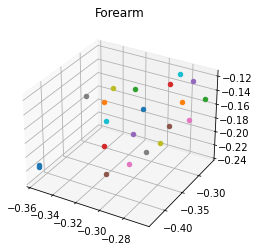

done showing plot


In [7]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation

# coords = np.array(coords_elbow)

# t = np.array([np.ones(1)*i for i in range(554)]).flatten()
# df = pd.DataFrame({"time" : t, "x" : coords[:,0], "y" : coords[:,1], "z" : coords[:,2]})

# def update_graph(num):
#     data=df[df['time']==num]
#     graph._offsets3d = (data.x, data.y, data.z)
#     title.set_text('Forearm plot, time={}'.format(num))

n_frames=len(cam[0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('Forearm')

hs=[]
for b_idx,body_part in enumerate(body_parts):
    coord=coordinates[body_part][0]
    h=ax.scatter(coord[0,0], coord[0,1], coord[0,2])
    hs.append(h)

def update_graph(frame_idx):
    print(frame_idx)
    for b_idx,body_part in enumerate(body_parts):
        coord=coordinates[body_part][frame_idx]
        hs[b_idx]._offsets3d = (coord[0,0], coord[0,1], coord[0,2])        
    title.set_text('time={}'.format(frame_idx))

ani = matplotlib.animation.FuncAnimation(fig, update_graph, frames=n_frames, 
                               interval=1000, blit=False, repeat=False)
print('showing plot')
plt.show()
print('done showing plot')